In [1]:
# Make Necessary Imports 
import csv
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
from scipy.interpolate import make_interp_spline 

In [2]:
def read_data_to_array(location, regret_player_base, regret_arm_base, stability_base, param, number_of_runs): 
    curdir = os.getcwd()
    os.chdir(location)
    # Load all the runs into a dictg
    p_reg = {}
    a_reg = {}
    a_stab = {}

    for run_number in range(number_of_runs):
        print(f"{param}, run number = {run_number}")
        file_p_regret = glob.glob(regret_player_base + str(param) + '_run_' + str(run_number) + '.csv')[0]
        file_a_regret = glob.glob(regret_arm_base + str(param) + '_run_' + str(run_number) + '.csv')[0]
        file_stability = glob.glob(stability_base + str(param) + '_run_' + str(run_number) + '.csv')[0]

        with open(file_p_regret) as file:
            reg_p = np.loadtxt(file, delimiter=',')

        with open(file_a_regret) as file:
            reg_a = np.loadtxt(file, delimiter=',')

        with open(file_stability) as file:
            stab = np.loadtxt(file, delimiter=',')

        p_reg[run_number] = reg_p
        a_reg[run_number] = reg_a
        a_stab[run_number] = stab
    os.chdir(curdir)
    return p_reg, a_reg, a_stab

In [3]:
def change_array_to_logs(out_loc, param, player_regrets, arm_regrets, stabilities):

    # Arrays to store average regret and stability for plotting purposes
    average_player_regret_to_return = []
    average_arm_regret_to_return = []
    average_stability_to_return = []


    # OPEN THE NECESSARY CSV FILES TO CREATE THE LOGS 
    regret_file_player = open(out_loc + str(param) + "_player_regret.csv", "w",  newline="")  # Open regret csv
    regret_file_arm = open(out_loc + str(param) + "_arm_regret.csv", "w", newline="")
    stability_file = open(out_loc + str(param) + "_stability.csv", "w", newline="")  # Open stability csv
  
        
    # Need to log all of this into a master CSV
    writer_r_player = csv.writer(regret_file_player)  # Create CSV writer for player regret
    writer_r_arm = csv.writer(regret_file_arm)
    writer_s = csv.writer(stability_file)  # Create CSV writer for player stability

    # Create Headers for regret and stability master CSV
    r_head_player = ['Time Step']
    r_head_arm = ['Time Step']
    s_head = ['Time Step']
    for temp in range(len(player_regrets.keys())):
        r_head_player.append("Run " + str(temp))
        r_head_arm.append("Run " + str(temp))
        s_head.append("Run " + str(temp))
    r_head_player.append("Average Regret")
    r_head_arm.append("Average Regret")
    s_head.append("Average Stability")

    writer_r_player.writerow(r_head_player)  # Write header of regret file
    writer_r_arm.writerow(r_head_arm)
    writer_s.writerow(s_head)  # Write header of stability file


    for t in range(len(player_regrets[0])):
        l_r_p = 0.0
        l_r_a = 0.0
        l_s = 0.0

        row_r_p = [t]
        row_r_a = [t]
        row_s = [t]

        for run_number in range(len(player_regrets.keys())):
            row_r_p.append(player_regrets[run_number][t])
            row_r_a.append(arm_regrets[run_number][t])
            row_s.append(stabilities[run_number][t])
            l_r_p += player_regrets[run_number][t]
            l_r_a += arm_regrets[run_number][t]
            l_s += stabilities[run_number][t]

        avg_regret_player = l_r_p / len(player_regrets)
        avg_regret_arm = l_r_a / len(player_regrets)
        avg_stab = (l_s / len(player_regrets)) * 100
        row_r_p.append(avg_regret_player)
        row_r_a.append(avg_regret_arm)
        row_s.append(avg_stab)
        average_player_regret_to_return.append(avg_regret_player)
        average_arm_regret_to_return.append(avg_regret_arm)
        average_stability_to_return.append(avg_stab)

        writer_r_player.writerow(row_r_p)
        writer_r_arm.writerow(row_r_a)
        writer_s.writerow(row_s)

        row_r_p = []
        row_r_a = []
        row_s = []
    regret_file_player.close()
    regret_file_arm.close()
    stability_file.close()
    return average_player_regret_to_return, average_arm_regret_to_return, average_stability_to_return

In [9]:
num_runs = 25 
type = "nit UCB"

#### Don't know arm preferences on both sides

PLAYER RANDOM || ARM RANDOM

5, run number = 0
5, run number = 1
5, run number = 2
5, run number = 3
5, run number = 4
5, run number = 5
5, run number = 6
5, run number = 7
5, run number = 8
5, run number = 9
5, run number = 10
5, run number = 11
5, run number = 12
5, run number = 13
5, run number = 14
5, run number = 15
5, run number = 16
5, run number = 17
5, run number = 18
5, run number = 19
5, run number = 20
5, run number = 21
5, run number = 22
5, run number = 23
5, run number = 24
10, run number = 0
10, run number = 1
10, run number = 2
10, run number = 3
10, run number = 4
10, run number = 5
10, run number = 6
10, run number = 7
10, run number = 8
10, run number = 9
10, run number = 10
10, run number = 11
10, run number = 12
10, run number = 13
10, run number = 14
10, run number = 15
10, run number = 16
10, run number = 17
10, run number = 18
10, run number = 19
10, run number = 20
10, run number = 21
10, run number = 22
10, run number = 23
10, run number = 24
15, run number = 0
15, run number = 1
15, run

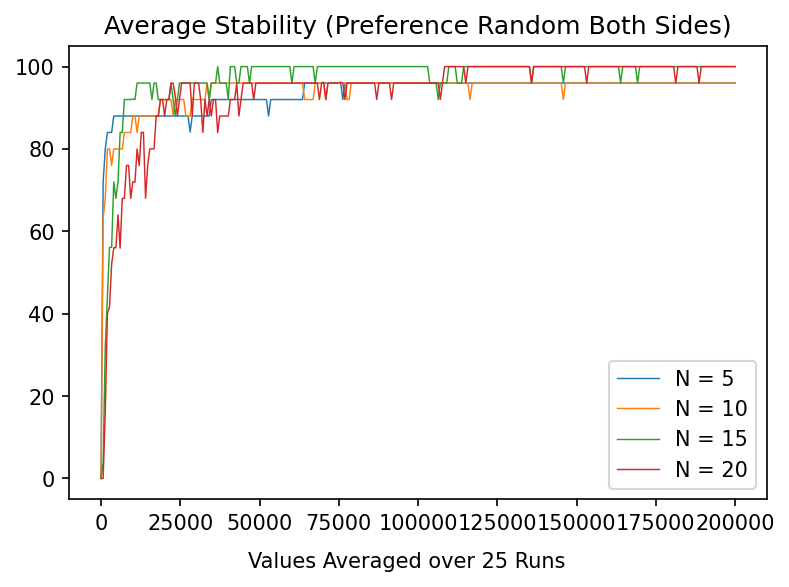

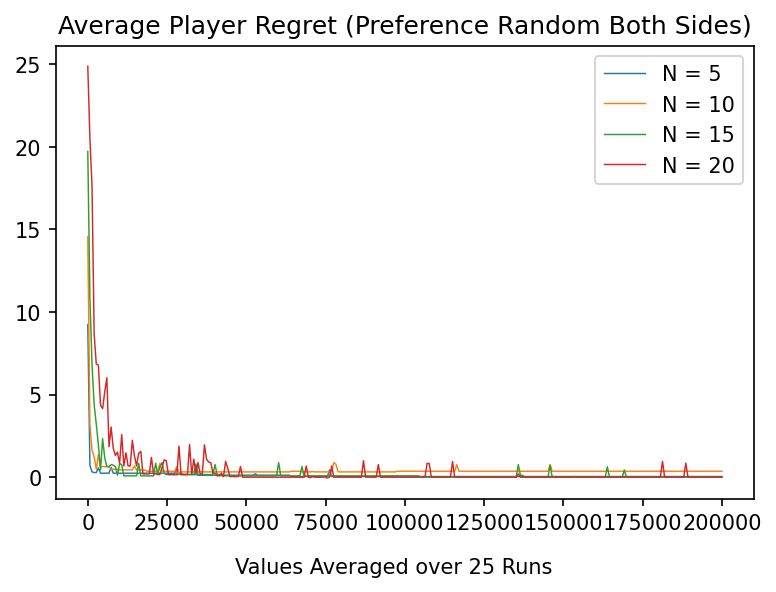

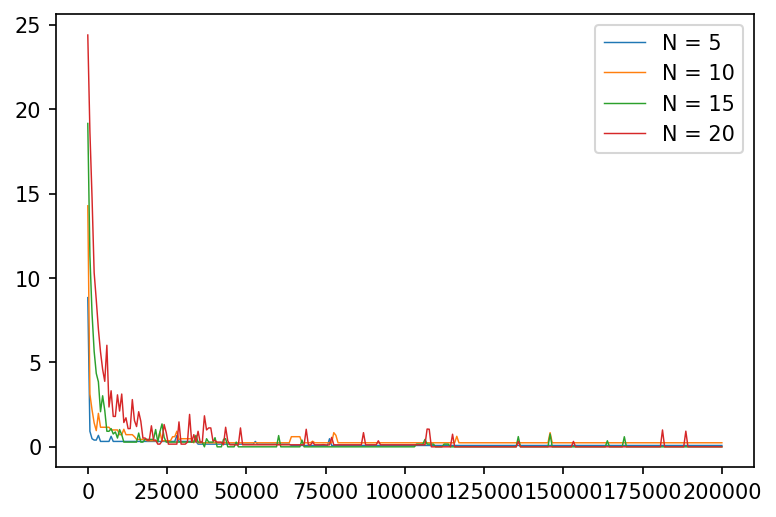

In [10]:
regret_player_b = 'regret_p_market_size_'
regret_arm_b = 'regret_a_market_size_'
stability_b = 'stability_market_size_'
if type == "UCB":
    loc = r'/Users/gaurab/Documents/Git/logs/analysis/UCB/rnd rnd/'
    loc1 = r'/Users/gaurab/Documents/Git/logs/analysis/UCB/rnd rnd/MASTER_N_'   
else: 
    loc = r'/Users/gaurab/Documents/Git/logs/analysis/Thompson/rnd rnd/'
    loc1 = r'/Users/gaurab/Documents/Git/logs/analysis/Thompson/rnd rnd/MASTER_N_'



# Market Sizes to Iterate over 
iterate_over = [5, 10, 15, 20] 
m_regrets_p = {}
m_regrets_a = {}
m_stability = {}

length = 200000

for param in iterate_over: 
    player_regret, arm_regret, stability = read_data_to_array(loc, regret_player_b, regret_arm_b, stability_b, param, num_runs)
    rl_p, rl_a, sl = change_array_to_logs(loc1, param, player_regret, arm_regret, stability)
    m_regrets_p[param] = rl_p[0:length]
    m_regrets_a[param] = rl_a[0:length]
    m_stability[param] = sl[0:length]


 # Prepare the X-Axis
x_axis = np.zeros(len(rl_a[0:length]))
for i in range(length): x_axis[i] = i
x_new = np.linspace(x_axis.min(), x_axis.max(), 300)



# Make Stability Plot 
#========================================================================================================================
legend = []
for s in m_stability.keys():
    gfg = make_interp_spline(x_axis, m_stability[s], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("N = " + str(s))
plt.legend(legend)
plt.title("Average Stability (Preference Random Both Sides)")
plt.figtext(0.5, 0.01, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(loc + "stability.png")  # First save then show
plt.show()
plt.close()



# Make player regret plot 
#========================================================================================================================
legend = [] 
for r in m_regrets_p.keys():
    gfg = make_interp_spline(x_axis, m_regrets_p[r], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("N = " + str(r))

plt.title("Average Player Regret (Preference Random Both Sides)")
plt.figtext(0.5, 0.001, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.legend(legend)
plt.savefig(loc + "player_regret.png")
plt.show() 
plt.close() 



# Make arm regret plot 
#========================================================================================================================
legend = []
for r in m_regrets_a.keys():
    gfg = make_interp_spline(x_axis, m_regrets_a[r], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("N = " + str(r))
plt.legend(legend)

# plt.title("Average Arm Regret (Preference Random Both Sides)")
# plt.figtext(0.5, 0.001, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(loc + "arm_regret.png")  # First save then show
plt.show()
plt.close()


PLAYER HET || ARM RANDOM

0, run number = 0
0, run number = 1
0, run number = 2
0, run number = 3
0, run number = 4
0, run number = 5
0, run number = 6
0, run number = 7
0, run number = 8
0, run number = 9
0, run number = 10
0, run number = 11
0, run number = 12
0, run number = 13
0, run number = 14
0, run number = 15
0, run number = 16
0, run number = 17
0, run number = 18
0, run number = 19
0, run number = 20
0, run number = 21
0, run number = 22
0, run number = 23
0, run number = 24
10, run number = 0
10, run number = 1
10, run number = 2
10, run number = 3
10, run number = 4
10, run number = 5
10, run number = 6
10, run number = 7
10, run number = 8
10, run number = 9
10, run number = 10
10, run number = 11
10, run number = 12
10, run number = 13
10, run number = 14
10, run number = 15
10, run number = 16
10, run number = 17
10, run number = 18
10, run number = 19
10, run number = 20
10, run number = 21
10, run number = 22
10, run number = 23
10, run number = 24
100, run number = 0
100, run number = 1
100, 

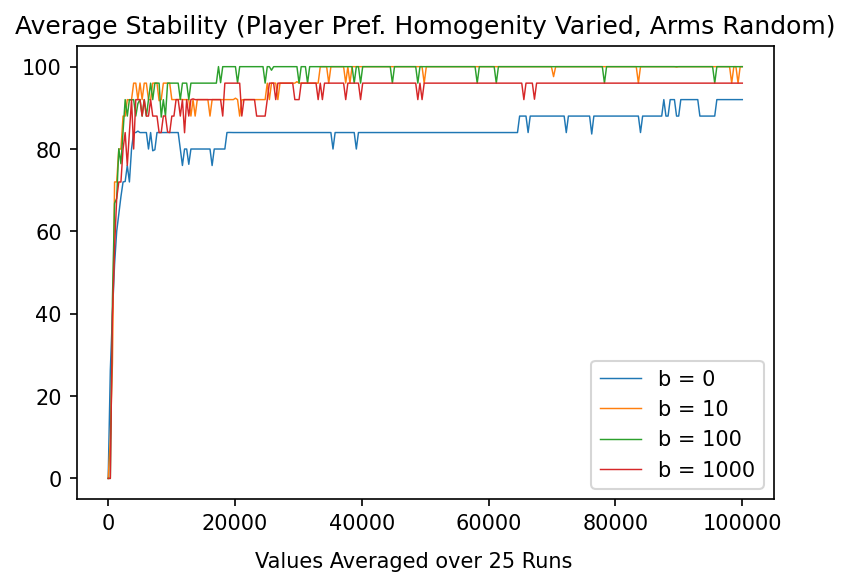

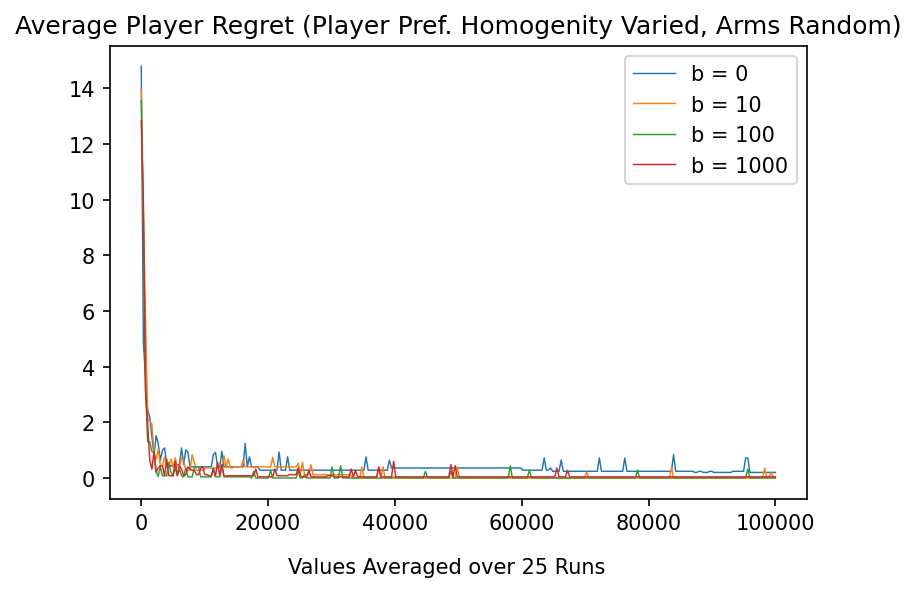

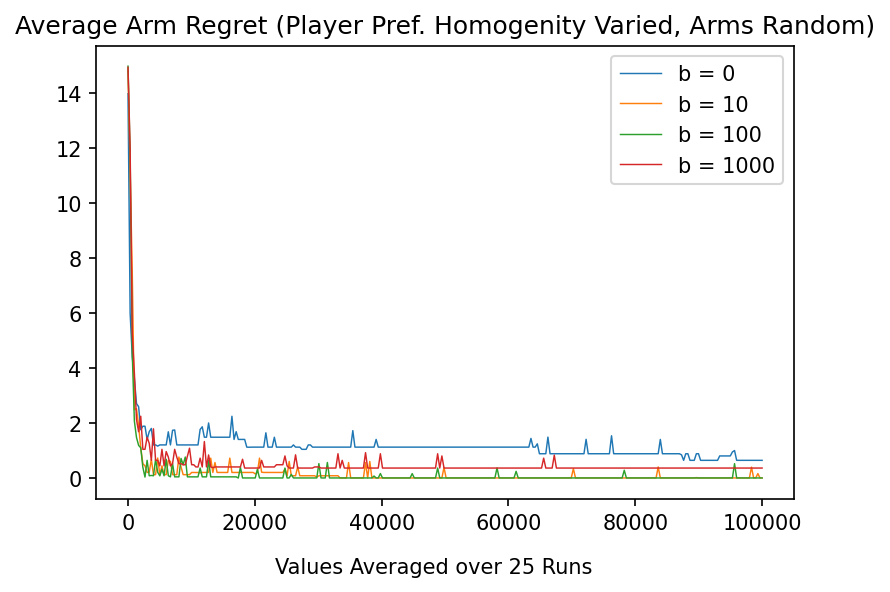

In [11]:
regret_player_b = 'regret_p_beta_'
regret_arm_b = 'regret_a_beta_'
stability_b = 'stability_beta_'
if type == "UCB":
    loc = r'/Users/gaurab/Documents/Git/logs/analysis/UCB/het rnd/'
    loc1 = r'/Users/gaurab/Documents/Git/logs/analysis/UCB/het rnd/MASTER_beta_'
else: 
    loc = r'/Users/gaurab/Documents/Git/logs/analysis/Thompson/het rnd/'
    loc1 = r'/Users/gaurab/Documents/Git/logs/analysis/Thompson/het rnd/MASTER_beta_'

# Beta values that were used 
iterate_over = [0, 10, 100, 1000] 
m_regrets_p = {}
m_regrets_a = {}
m_stability = {}


for param in iterate_over: 
    player_regret, arm_regret, stability = read_data_to_array(loc, regret_player_b, regret_arm_b, stability_b, param, num_runs)
    rl_p, rl_a, sl = change_array_to_logs(loc1, param, player_regret, arm_regret, stability)
    m_regrets_p[param] = rl_p
    m_regrets_a[param] = rl_a
    m_stability[param] = sl


 # Prepare the X-Axis
x_axis = np.zeros(len(rl_a))
for i in range(len(rl_a)): x_axis[i] = i
x_new = np.linspace(x_axis.min(), x_axis.max(), 300)



# Make Stability Plot 
#========================================================================================================================
legend = []
for s in m_stability.keys():
    gfg = make_interp_spline(x_axis, m_stability[s], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("b = " + str(s))
plt.legend(legend)
plt.title("Average Stability (Player Pref. Homogenity Varied, Arms Random)")
plt.figtext(0.5, 0.01, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(loc + "stability.png")  # First save then show
plt.show()
plt.close()



# Make player regret plot 
#========================================================================================================================
legend = [] 
for r in m_regrets_p.keys():
    gfg = make_interp_spline(x_axis, m_regrets_p[r], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("b = " + str(r))

plt.title("Average Player Regret (Player Pref. Homogenity Varied, Arms Random)")
plt.figtext(0.5, 0.001, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.legend(legend)
plt.savefig(loc + "player_regret.png")
plt.show() 
plt.close() 



# Make arm regret plot 
#========================================================================================================================
legend = []
for r in m_regrets_a.keys():
    gfg = make_interp_spline(x_axis, m_regrets_a[r], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("b = " + str(r))
plt.legend(legend)

plt.title("Average Arm Regret (Player Pref. Homogenity Varied, Arms Random)")
plt.figtext(0.5, 0.001, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(loc + "arm_regret.png")  # First save then show
plt.show()
plt.close()

PLAYER RANDOM || ARM HET

0, run number = 0
0, run number = 1
0, run number = 2
0, run number = 3
0, run number = 4
0, run number = 5
0, run number = 6
0, run number = 7
0, run number = 8
0, run number = 9
0, run number = 10
0, run number = 11
0, run number = 12
0, run number = 13
0, run number = 14
0, run number = 15
0, run number = 16
0, run number = 17
0, run number = 18
0, run number = 19
0, run number = 20
0, run number = 21
0, run number = 22
0, run number = 23
0, run number = 24
10, run number = 0
10, run number = 1
10, run number = 2
10, run number = 3
10, run number = 4
10, run number = 5
10, run number = 6
10, run number = 7
10, run number = 8
10, run number = 9
10, run number = 10
10, run number = 11
10, run number = 12
10, run number = 13
10, run number = 14
10, run number = 15
10, run number = 16
10, run number = 17
10, run number = 18
10, run number = 19
10, run number = 20
10, run number = 21
10, run number = 22
10, run number = 23
10, run number = 24
100, run number = 0
100, run number = 1
100, 

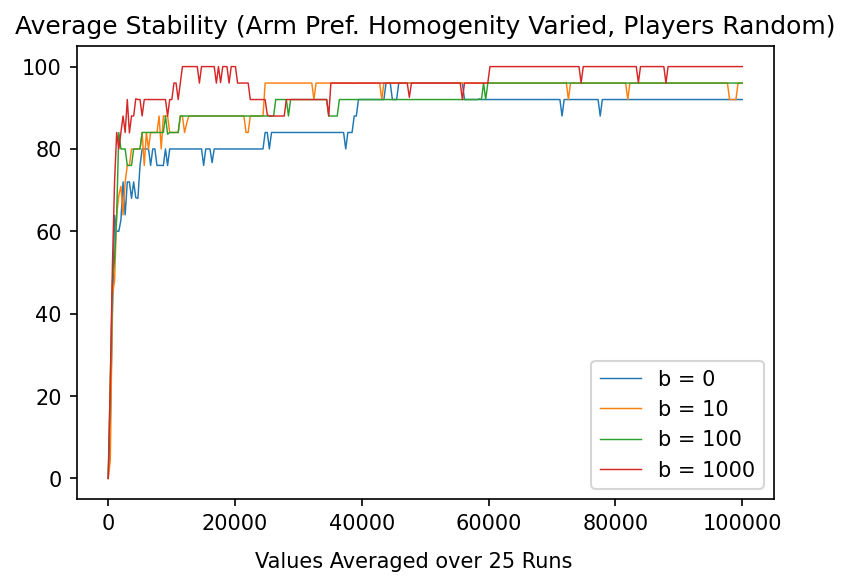

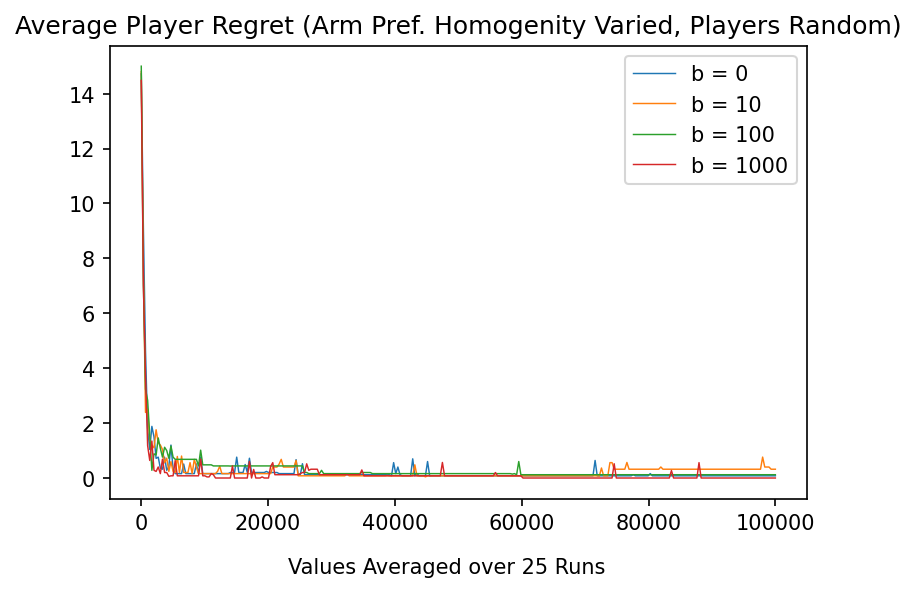

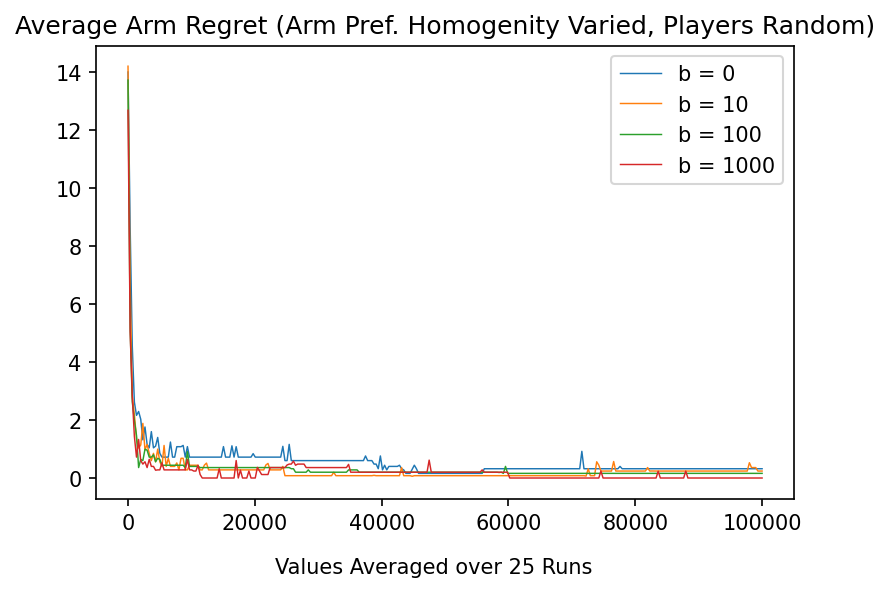

In [12]:
regret_player_b = 'regret_p_beta_'
regret_arm_b = 'regret_a_beta_'
stability_b = 'stability_beta_'

if type == "UCB": 
    loc = r'/Users/gaurab/Documents/Git/logs/analysis/UCB/rnd het/'
    loc1 = r'/Users/gaurab/Documents/Git/logs/analysis/UCB/rnd het/MASTER_beta_'
else: 
    loc = r'/Users/gaurab/Documents/Git/logs/analysis/Thompson/rnd het/'
    loc1 = r'/Users/gaurab/Documents/Git/logs/analysis/Thompson/rnd het/MASTER_beta_'


# Beta values that were used 
iterate_over = [0, 10, 100, 1000] 
m_regrets_p = {}
m_regrets_a = {}
m_stability = {}


for param in iterate_over: 
    player_regret, arm_regret, stability = read_data_to_array(loc, regret_player_b, regret_arm_b, stability_b, param, num_runs)
    rl_p, rl_a, sl = change_array_to_logs(loc1, param, player_regret, arm_regret, stability)
    m_regrets_p[param] = rl_p
    m_regrets_a[param] = rl_a
    m_stability[param] = sl


 # Prepare the X-Axis
x_axis = np.zeros(len(rl_a))
for i in range(len(rl_a)): x_axis[i] = i
x_new = np.linspace(x_axis.min(), x_axis.max(), 300)



# Make Stability Plot 
#========================================================================================================================
legend = []
for s in m_stability.keys():
    gfg = make_interp_spline(x_axis, m_stability[s], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("b = " + str(s))
plt.legend(legend)
plt.title("Average Stability (Arm Pref. Homogenity Varied, Players Random)")
plt.figtext(0.5, 0.01, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(loc + "stability.png")  # First save then show
plt.show()
plt.close()



# Make player regret plot 
#========================================================================================================================
legend = [] 
for r in m_regrets_p.keys():
    gfg = make_interp_spline(x_axis, m_regrets_p[r], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("b = " + str(r))

plt.title("Average Player Regret (Arm Pref. Homogenity Varied, Players Random)")
plt.figtext(0.5, 0.001, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.legend(legend)
plt.savefig(loc + "player_regret.png")
plt.show() 
plt.close() 



# Make arm regret plot 
#========================================================================================================================
legend = []
for r in m_regrets_a.keys():
    gfg = make_interp_spline(x_axis, m_regrets_a[r], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("b = " + str(r))
plt.legend(legend)

plt.title("Average Arm Regret (Arm Pref. Homogenity Varied, Players Random)")
plt.figtext(0.5, 0.001, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(loc + "arm_regret.png")  # First save then show
plt.show()
plt.close()

PLAYER HET || ARM HET

/Users/gaurab/Documents/Git/logs/analysis/Thompson/het het/
0, run number = 0
0, run number = 1
0, run number = 2
0, run number = 3
0, run number = 4
0, run number = 5
0, run number = 6
0, run number = 7
0, run number = 8
0, run number = 9
0, run number = 10
0, run number = 11
0, run number = 12
0, run number = 13
0, run number = 14
0, run number = 15
0, run number = 16
0, run number = 17
0, run number = 18
0, run number = 19
0, run number = 20
0, run number = 21
0, run number = 22
0, run number = 23
0, run number = 24
10, run number = 0
10, run number = 1
10, run number = 2
10, run number = 3
10, run number = 4
10, run number = 5
10, run number = 6
10, run number = 7
10, run number = 8
10, run number = 9
10, run number = 10
10, run number = 11
10, run number = 12
10, run number = 13
10, run number = 14
10, run number = 15
10, run number = 16
10, run number = 17
10, run number = 18
10, run number = 19
10, run number = 20
10, run number = 21
10, run number = 22
10, run number = 23
10, r

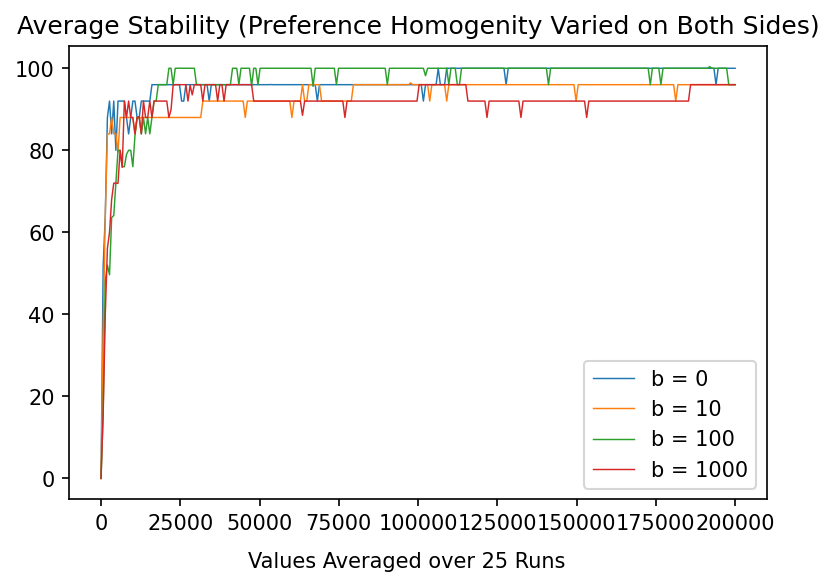

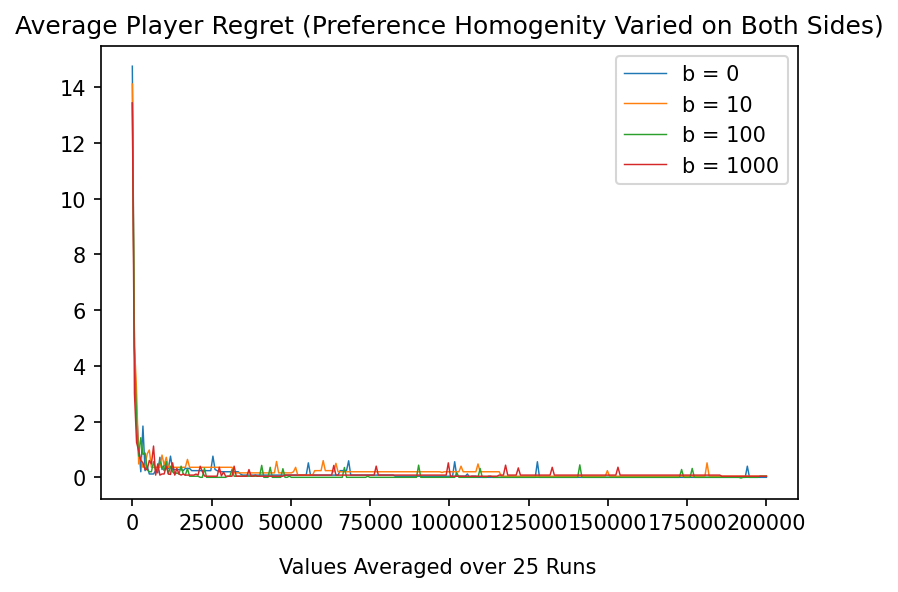

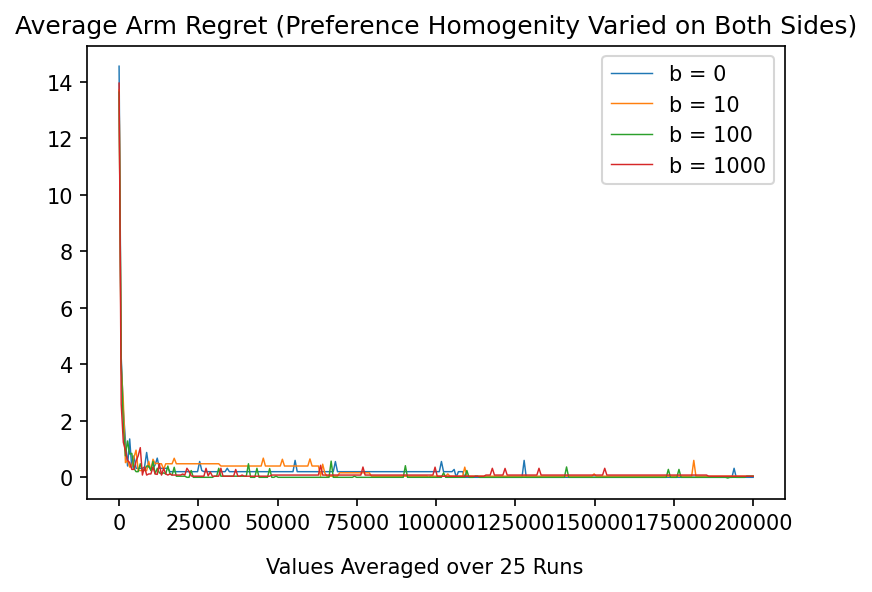

In [13]:
regret_player_b = 'regret_p_beta_'
regret_arm_b = 'regret_a_beta_'
stability_b = 'stability_beta_'

if type == "UCB": 
    loc = r'/Users/gaurab/Documents/Git/logs/analysis/UCB/het het/'
    loc1 = r'/Users/gaurab/Documents/Git/logs/analysis/UCB/het het/MASTER_beta_'
else: 
    loc = r'/Users/gaurab/Documents/Git/logs/analysis/Thompson/het het/'
    loc1 = r'/Users/gaurab/Documents/Git/logs/analysis/Thompson/het het/MASTER_beta_'

# Beta values that were used 
iterate_over = [0, 10, 100, 1000] 
m_regrets_p = {}
m_regrets_a = {}
m_stability = {}
print(loc)

for param in iterate_over: 
    player_regret, arm_regret, stability = read_data_to_array(loc, regret_player_b, regret_arm_b, stability_b, param, num_runs)
    rl_p, rl_a, sl = change_array_to_logs(loc1, param, player_regret, arm_regret, stability)
    m_regrets_p[param] = rl_p
    m_regrets_a[param] = rl_a
    m_stability[param] = sl


 # Prepare the X-Axis
x_axis = np.zeros(len(rl_a))
for i in range(len(rl_a)): x_axis[i] = i
x_new = np.linspace(x_axis.min(), x_axis.max(), 300)



# Make Stability Plot 
#========================================================================================================================
legend = []
for s in m_stability.keys():
    gfg = make_interp_spline(x_axis, m_stability[s], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("b = " + str(s))
plt.legend(legend)
plt.title("Average Stability (Preference Homogenity Varied on Both Sides)")
plt.figtext(0.5, 0.01, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(loc + "stability.png")  # First save then show
plt.show()
plt.close()



# Make player regret plot 
#========================================================================================================================
legend = [] 
for r in m_regrets_p.keys():
    gfg = make_interp_spline(x_axis, m_regrets_p[r], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("b = " + str(r))

plt.title("Average Player Regret (Preference Homogenity Varied on Both Sides)")
plt.figtext(0.5, 0.001, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.legend(legend)
plt.savefig(loc + "player_regret.png")
plt.show() 
plt.close() 



# Make arm regret plot 
#========================================================================================================================
legend = []
for r in m_regrets_a.keys():
    gfg = make_interp_spline(x_axis, m_regrets_a[r], k=3)
    y_new = gfg(x_new)
    plt.plot(x_new, y_new, linewidth=0.7)
    legend.append("b = " + str(r))
plt.legend(legend)

plt.title("Average Arm Regret (Preference Homogenity Varied on Both Sides)")
plt.figtext(0.5, 0.001, f"Values Averaged over {num_runs} Runs", wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(loc + "arm_regret.png")  # First save then show
plt.show()
plt.close()
